# COVID-19 Time Series
This tutorial will visualize COVID-19 data as a time series, and along the way, show what a workflow might look like when using ahlive.

Click [here](covid_19_time_series.ipynb#final-animation) to see the full animation.

### load data

To start, we will import ahlive and abbrieviate as `ah`. Then, we open up the COVID-19 global cases dataset and display it.

`raw` is set to `True` for demonstration purposes, i.e. how to preprocess a "wide" dataset into a "tidy" dataset (this is done automatically if `raw=False`).

`verbose` is set to `True` to display the direct URL where the data is retrieved from, in addition to the source and base URL.

In [1]:
import ahlive as ah
import pandas as pd
df = ah.tutorial.open_dataset('covid19_global_cases', raw=True, verbose=True)
display(df)

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19
Data: https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
268            NaN             Vietnam  14.058324  108.277199        0   
269            NaN  West Bank and Gaza  31.952200   35.233200        0   
270            NaN               Yemen  15.552727   48.516388        0   
271            NaN              Zambia -13.133897   27.849332        0   
272            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/28/21  1/29/21  \
0          0        0        0        0        0  ...    54891    54939   
1          0        0        0        0        0  ...    75454    76350   
2          0        0        0        0        0  ...   106610   106887   
3          0        0        0        0        0  ...     9779     9837   
4          0        0        0        0        0  ...    19672    19723   
..       ...      ...      ...      ...      ...  ...      ...      ...   
268        2        2        2        2        2  ...     1651     1657   
269        0        0        0        0        0  ...   157593   158168   
270        0        0        0        0        0  ...     2120     2120   
271        0        0        0        0        0  ...    50319    51624   
272        0        0        0        0        0  ...    32646    32952   

     1/30/21  1/31/21  2/1/21  2/2/21  2/3/21  2/4/21  2/5/21  2/6/21  
0      55008    55023   55059   55121   55174   55231   55265   55330  
1      77251    78127   78992   79934   80941   81993   83082   84212  
2     107122   107339  107578  107841  108116  108381  108629  108629  
3       9885     9937    9972   10017   10070   10137   10172   10206  
4      19782    19796   19829   19900   19937   19996   20030   20062  
..       ...      ...     ...     ...     ...     ...     ...     ...  
268     1767     1817    1850    1882    1948    1957    1976    1985  
269   158559   158962  159443  159956  160426  161087  161559  162029  
270     2120     2121    2122    2122    2122    2122    2124    2127  
271    53352    54217   55042   56233   57489   59003   60427   61427  
272    33273    33388   33548   33814   33964   34171   34331   34487  

[273 rows x 386 columns]

### transform data

This data is in `wide` form, but ahlive expects input data to be in "tidy" form, which is defined below:

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each type of observational unit forms a table.

Fortunately, it's easy to convert to "tidy" form using `pd.melt`.

In [2]:
df_tidy = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date', value_name='Cases')
display(df_tidy)

Province/State      Country/Region        Lat        Long     Date  \
0                 NaN         Afghanistan  33.939110   67.709953  1/22/20   
1                 NaN             Albania  41.153300   20.168300  1/22/20   
2                 NaN             Algeria  28.033900    1.659600  1/22/20   
3                 NaN             Andorra  42.506300    1.521800  1/22/20   
4                 NaN              Angola -11.202700   17.873900  1/22/20   
...               ...                 ...        ...         ...      ...   
104281            NaN             Vietnam  14.058324  108.277199   2/6/21   
104282            NaN  West Bank and Gaza  31.952200   35.233200   2/6/21   
104283            NaN               Yemen  15.552727   48.516388   2/6/21   
104284            NaN              Zambia -13.133897   27.849332   2/6/21   
104285            NaN            Zimbabwe -19.015438   29.154857   2/6/21   

         Cases  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
104281    1985  
104282  162029  
104283    2127  
104284   61427  
104285   34487  

[104286 rows x 6 columns]

### subset data

Now, we can now use this "tidy" `pd.DataFrame` with ahlive. However, oftentimes it's best to subset and focus on a few datapoints, and also for this tutorial's simplicity sake.

In [3]:
countries = ['US', 'China', 'New Zealand', 'United Kingdom',
             'Brazil', 'India', 'Zambia', 'Pakistan']
df_subset = df_tidy.loc[df_tidy['Country/Region'].isin(countries)]
display(df_subset)

Province/State  Country/Region        Lat        Long  \
30                           NaN          Brazil -14.235000  -51.925300   
58                         Anhui           China  31.825700  117.226400   
59                       Beijing           China  40.182400  116.414200   
60                     Chongqing           China  30.057200  107.874000   
61                        Fujian           China  26.078900  117.987400   
...                          ...             ...        ...         ...   
104273               Isle of Man  United Kingdom  54.236100   -4.548100   
104274                Montserrat  United Kingdom  16.742498  -62.187366   
104275  Turks and Caicos Islands  United Kingdom  21.694000  -71.797900   
104276                       NaN  United Kingdom  55.378100   -3.436000   
104284                       NaN          Zambia -13.133897   27.849332   

           Date    Cases  
30      1/22/20        0  
58      1/22/20        1  
59      1/22/20       14  
60      1/22/20        6  
61      1/22/20        1  
...         ...      ...  
104273   2/6/21      434  
104274   2/6/21       15  
104275   2/6/21     1654  
104276   2/6/21  3929835  
104284   2/6/21    61427  

[19100 rows x 6 columns]

Since this dataset was originally grouped by `Province/State`s, to further simplify and reduce crowdedness, we can group by `Country/Region` instead. Also since testing started mostly in March to April timeframe, we will begin animating in March.

In [4]:
df_countries = df_subset.groupby(['Date', 'Country/Region'])[['Cases']].sum().reset_index()
df_countries = df_countries.loc[df_countries['Date'] >= '3/01/21']
display(df_countries)

Date  Country/Region    Cases
1344  3/1/20          Brazil        2
1345  3/1/20           China    79932
1346  3/1/20           India        3
1347  3/1/20     New Zealand        1
1348  3/1/20        Pakistan        4
...      ...             ...      ...
3051  9/9/20     New Zealand     1792
3052  9/9/20        Pakistan   300030
3053  9/9/20              US  6361638
3054  9/9/20  United Kingdom   357613
3055  9/9/20          Zambia    13112

[1712 rows x 3 columns]

### serialize data

Pass the preprocessed `pd.DataFrame`, the `xs` column name (what we want plotted on the x-axis), the `ys` column name (what we want plotted on the y-axis) to instantiate the `ah.DataFrame` class.

In [5]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases')
print(ah_df)

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 1712)
Data variables:
    chart    (item) <U4 'line'
    label    (item) <U1 ''
    group    (item) <U1 ''
    interp   (item) <U6 'linear'
    ease     (item) <U6 'in_out'
    x        (item, state) object '3/1/20' '3/1/20' ... '9/9/20' '9/9/20'
    y        (item, state) int64 2 79932 3 1 4 ... 300030 6361638 357613 13112




However, if we examine the output, we notice an abnormally large number of `state`s, or number of frames in the animation, and only 1 `item`. In other words, ahlive is unaware of the different `Country/Region`s; thus we need to pass that in as the `label`.

In [6]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases', label='Country/Region')
print(ah_df)

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 8, state: 214)
Data variables:
    chart    (item) <U4 'line' 'line' 'line' 'line' 'line' 'line' 'line' 'line'
    label    (item) <U14 'Brazil' 'China' 'India' ... 'United Kingdom' 'Zambia'
    group    (item) <U1 '' '' '' '' '' '' '' ''
    interp   (item) <U6 'linear' 'linear' 'linear' ... 'linear' 'linear'
    ease     (item) <U6 'in_out' 'in_out' 'in_out' ... 'in_out' 'in_out'
    x        (item, state) object '3/1/20' '3/10/20' ... '9/8/20' '9/9/20'
    y        (item, state) int64 2 31 38 52 151 ... 12776 12836 12952 13112




With that done, we can *almost* generate the the first animation by calling the `render` method, but before doing so, it's good to set `animate` to a list of `state`s. This limits the number of frames in the animation so we can get a preview of what the full animation looks like and ensure everything looks correct. We can also specify `fps` to prevent the animation from flashing.

[########################################] | 100% Completed |  7.4s



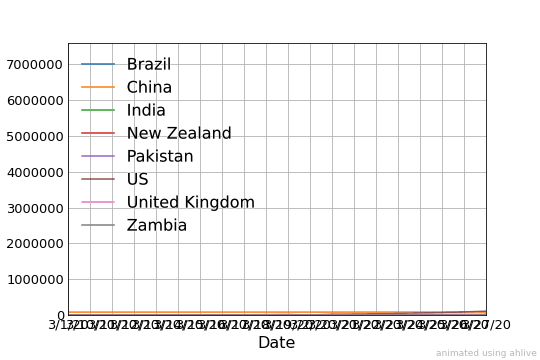

In [7]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases', label='Country/Region',
                     animate=[20, 50, 250, 300], fps=1)
ah_df.render()

### tweak animation

By doing so, we can immediately notice that:

1. The `ylabel` is cut-off.
2. The dates are crowded.
3. COVID tests did not start until March.
4. it's hard to intuitively grasp the large numbers.
5. The legend isn't sorted by max.

To remedy this:

1. Increase the width of the figure through `figsize`.
2. Replace date `str`s with `np.datetime64` objects.
3. Slice dataframe to begin around March.
4. Scale the values by a million (`1e6`) and rerun.
5. Set `sortby='y'` in config.

Also, to reduce the size of this tutorial page, we will resample to every week.

In [8]:
df_dts = df_countries.copy()
df_dts['Date'] = pd.to_datetime(df_dts['Date'])
df_dts = df_dts.loc[df_dts['Date'] >= '2020-03-01']
df_dts = df_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country/Region'
])['Cases'].last().reset_index()
df_scale = df_dts.sort_values('Date')
df_scale['Cases'] /= 1e6

We can rerun with the newly preprocessed `pd.DataFrame`. We can also use any `str` in `animate` for a subset. It will also automatically set `fps`.

[########################################] | 100% Completed |  4.1s



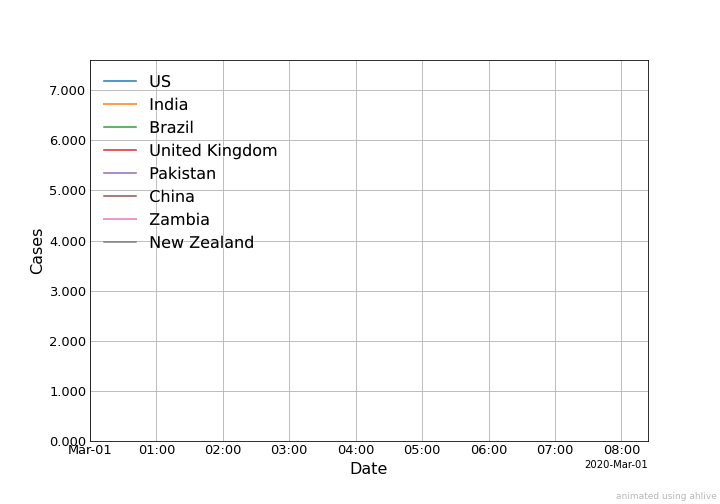

In [9]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_df.render()

We now note that there are extraneous decimal points so we can use `config` to set the `format`. We may also want to add `state_labels` and `inline_labels` to see directly see the x and y values.

[########################################] | 100% Completed |  3.9s



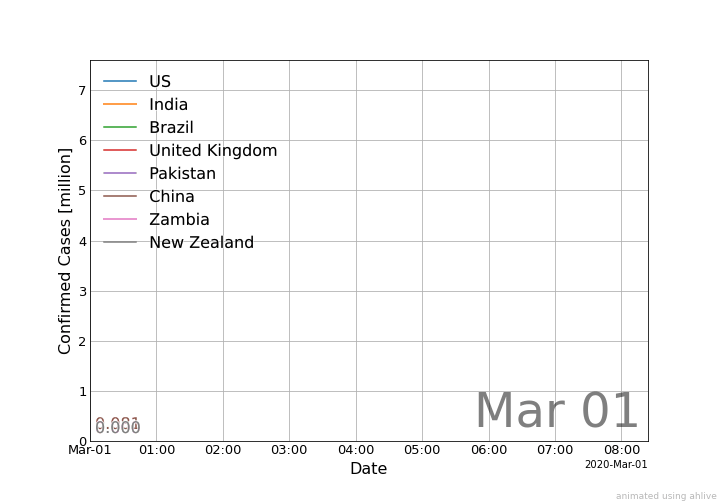

In [10]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

We can also set `animate` as `head_28` to animate the first 28 frames.

[########################################] | 100% Completed | 10.8s



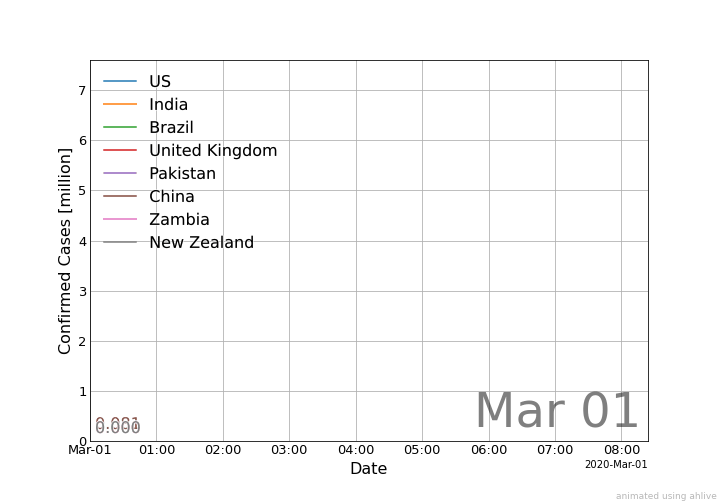

In [11]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='head_28'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

Since there's not much to see in the first 28 frames, we can also animate from the tail using `tail_28`.

[########################################] | 100% Completed | 11.5s



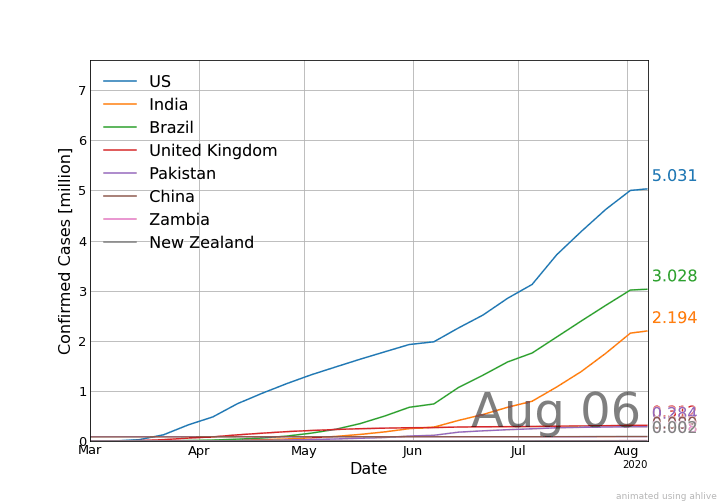

In [12]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='tail_28'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

### cascade data

It looks decent for the most part, but there's too much going on to easily garner any insights from it and there's a lot of crowding near the bottom. We can utilize `join='cascade'` to see country by country. Also, the plot can be a bit misleading because New Zealand has a much smaller population than US so we should try normalizing by population.

In [13]:
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='Country/Region', right_on='combined_key')
df_norm['Cases'] = df_norm['Cases'] * 1e6 / df_norm['population']  # previously scaled by 1 million
df_norm['Cases'] *= 1e5  # scale by per 100k people

COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


After updating the `ylabel` to reflect the normalization, we should once again animate a few frames to see if everything looks alright.

[####################################    ] | 90% Completed |  3.3s

/mnt/c/Users/Solactus/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1145: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))


[########################################] | 100% Completed |  3.5s



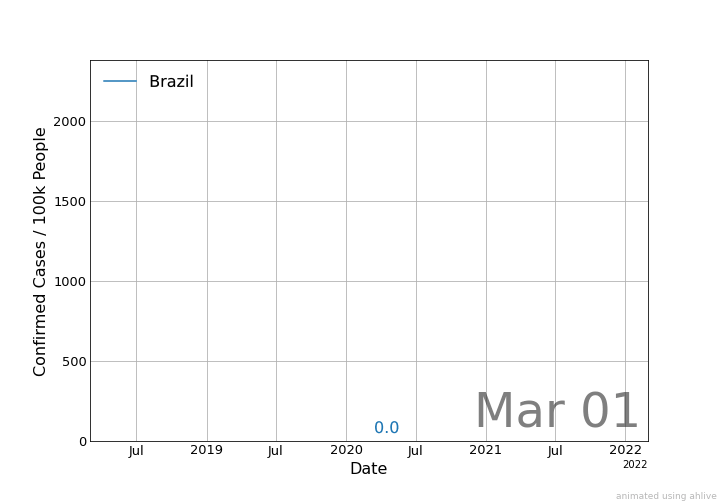

In [14]:
ah_df = ah.DataFrame(
    df_norm, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', animate='test'
).config('legend', sortby='y')
ah_df.render()

Looks mostly good, but the lines do not appear in a pleasing manner even with `sortby='y'` and the fixed `ylims` is not ideal. We can first sort the dataframe manually.

In [15]:
ordering = df_norm.groupby('Country/Region').max().sort_values('Cases').index
df_sort = df_norm.copy()
df_sort['Country/Region'] = pd.Categorical(
    df_sort['Country/Region'], categories=ordering, ordered=True)
df_sort = df_sort.sort_values(['Country/Region', 'Date'])

Then set `ylims` to explore to take full advantage of the `cascade`.

[#####################                   ] | 54% Completed |  2.0s

/mnt/c/Users/Solactus/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1145: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))
/mnt/c/Users/Solactus/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1145: UserWarning: Attempting to set identical bottom == top == 5.750079094733517 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))


[########################################] | 100% Completed |  3.6s



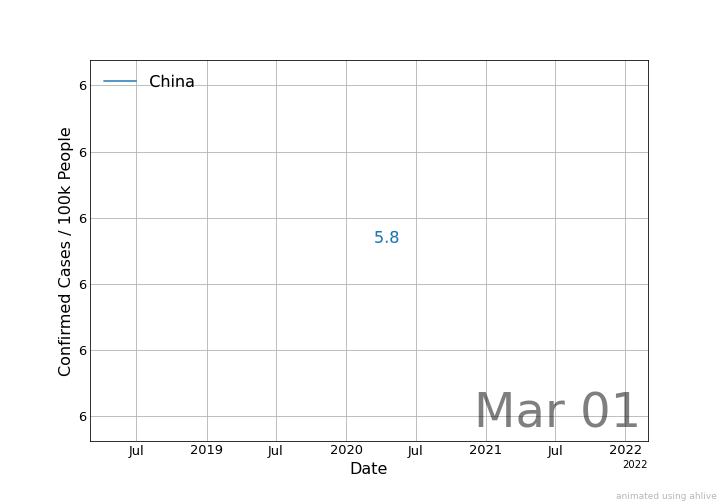

In [16]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylims='explore',
    animate='test'
)
ah_df.render()

Let's add a title and cite the data! We can also use multiple processors!

[########################################] | 100% Completed |  4.8s



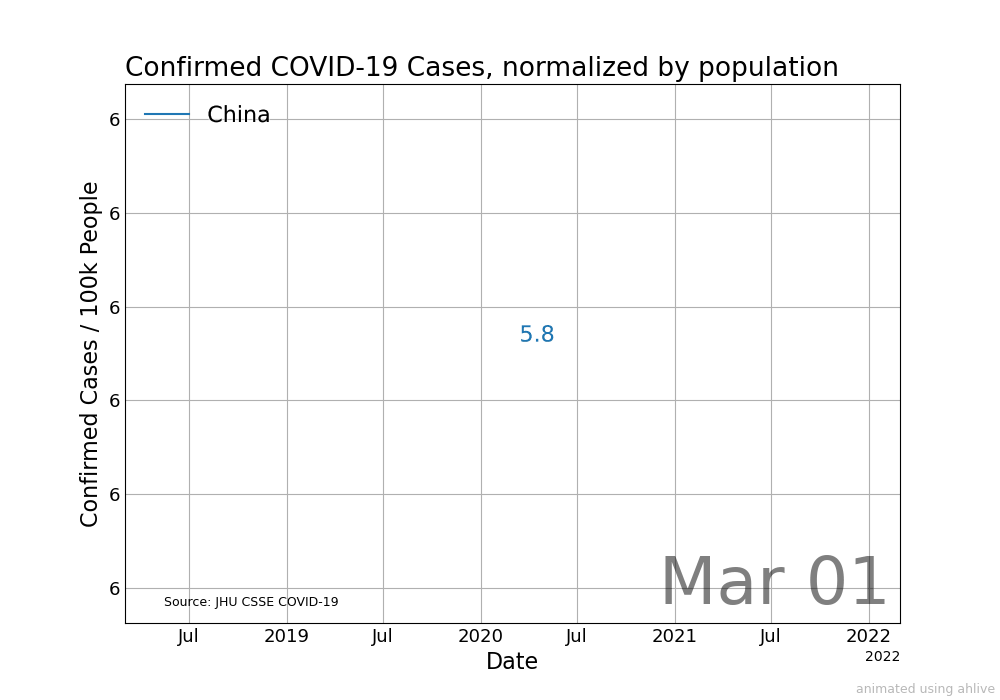

In [17]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylims='explore',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4,
    animate='test'
)
ah_df.render()

### final animation

There are many ways we can customize this like setting `inline_labels='Country/Region'` and chaining a `reference`. Lastly, we can also slow down the animation by setting a higher `frames` per state.

[########################################] | 100% Completed |  1min  5.9s



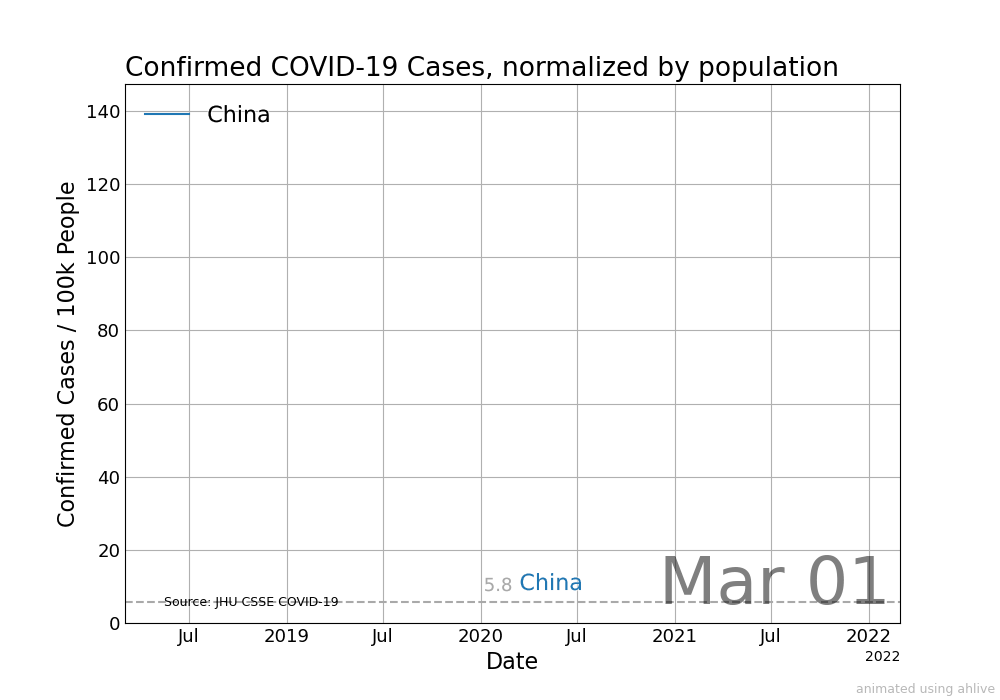

In [18]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Country/Region',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylim1s='explore_1',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4, frames=2
).reference(y0s='y', inline_labels='y')
ah_df.render()

That's about it for this tutorial. See the next tutorial to see how to create a bar chart race.

### full code

```python
import ahlive as ah
import pandas as pd

# load dataset
df = ah.tutorial.open_dataset('covid19_global_cases', raw=True, verbose=True)

# transform to tidy format
df_tidy = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date', value_name='Cases')

# subset countries
countries = ['US', 'China', 'New Zealand', 'United Kingdom',
             'Brazil', 'India', 'Zambia', 'Pakistan']
df_subset = df_tidy.loc[df_tidy['Country/Region'].isin(countries)]

# find total cases per country instead of province/region
df_countries = df_subset.groupby(['Date', 'Country/Region'])[['Cases']].sum().reset_index()
df_countries = df_countries.loc[df_countries['Date'] >= '3/01/21']

# convert to datetime
df_dts = df_countries.copy()
df_dts['Date'] = pd.to_datetime(df_dts['Date'])
df_dts = df_dts.loc[df_dts['Date'] >= '2020-03-01']
df_dts = df_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country/Region'
])['Cases'].last().reset_index()

# scale by a million
df_scale = df_dts.sort_values('Date')
df_scale['Cases'] /= 1e6

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='Country/Region', right_on='combined_key')
df_norm['Cases'] = df_norm['Cases'] * 1e6 / df_norm['population']  # previously scaled by 1 million
df_norm['Cases'] *= 1e5  # scale by per 100k people

# sort by cases
ordering = df_norm.groupby('Country/Region').max().sort_values('Cases').index
df_sort = df_norm.copy()
df_sort['Country/Region'] = pd.Categorical(
    df_sort['Country/Region'], categories=ordering, ordered=True)
df_sort = df_sort.sort_values(['Country/Region', 'Date'])

# render
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Country/Region',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylim1s='explore_1',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4
).reference(y0s='y', inline_labels='y')
ah_df.render()
```